# **I. Import Library Packages**

Mengimpor paket pustaka merupakan langkah yang **paling krusial** dalam pemrograman Python, khususnya untuk proyek ini. Paket dari **Pandas**, **NumPy**, **Sci-Kit Learn**, **TensorFlow** dan masih banyak lagi. Jika kita ingin menambahkan paket lain, cukup tambahkan di bagian **`I. Import Library Packages`**.

In [1]:
# Data Analysis Packages
import os
import pandas as pd
import numpy as np

# Visualization Tools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

# Image package
from PIL import Image

# TensorFlow package
import tensorflow as tf

# **II. Choose the Path**

In [2]:
TRAIN_DATASET_PATH = "./dataset/train/"

Bagian ini adalah definisi jalur ke folder kumpulan data pelatihan. Tanda **`./`** menunjukkan jalur tersebut relatif terhadap lokasi file Python atau buku catatan yang sedang Anda jalankan.

# **III. Create Indexes**

In [3]:
path = TRAIN_DATASET_PATH + "labels"

dct = {
    "images": [],
    "labels": [],
    "x_center": [],
    "y_center": [],
    "width": [],
    "height": []
}

for image in os.listdir(path):
    label_file = open(path + "/" + image)

    labels_str = label_file.read().split(sep="\n")
    labels_arr = []
    xmin_arr = []
    ymin_arr = []
    xmax_arr = []
    ymax_arr = []
    for label in labels_str:
        label_parts = label.split()
        labels_arr.append(int(label_parts[0]))
        xmin_arr.append(float(label_parts[1]))
        ymin_arr.append(float(label_parts[2]))
        xmax_arr.append(float(label_parts[3]))
        ymax_arr.append(float(label_parts[4]))

    dct["images"].append(image)
    dct["labels"].append(labels_arr)
    dct["x_center"].append(xmin_arr)
    dct["y_center"].append(ymin_arr)
    dct["width"].append(xmax_arr)
    dct["height"].append(ymax_arr)

    label_file.close()

# Create into a dataframe
df = pd.DataFrame(dct)

# Show the output
df

,images,labels,x_center,y_center,width,height
0,009000_jpg.rf.8c46e1aa5b46a0ad24ee4bcb2945d22a...,[2],[0.6538461538461539],[0.5420673076923077],[0.0625],[0.06610576923076923]
1,009002_jpg.rf.18bf80f2cfdb51f853da15019f787cef...,[2],[0.5576923076923077],[0.3389423076923077],[0.055288461538461536],[0.07091346153846154]
2,009003_jpg.rf.46963402c4cb6f46a47e508b892c6521...,[2],[0.4230769230769231],[0.3798076923076923],[0.09975961538461539],[0.055288461538461536]
3,009007_jpg.rf.a5143afbb0c741f3b60fc72403fdde6a...,[2],[0.4014423076923077],[0.35096153846153844],[0.055288461538461536],[0.1778846153846154]
4,009012_jpg.rf.bc99877ade8754d2be89119361e7820c...,[2],[0.8040865384615384],[0.3870192307692308],[0.052884615384615384],[0.07211538461538461]
...,...,...,...,...,...,...
6176,042973_jpg.rf.6792837ba2183435721cd7b4e9674ecd...,[1],[0.3485576923076923],[0.3016826923076923],[0.08533653846153846],[0.08653846153846154]
6177,042982_jpg.rf.79a8b11af76f74faa44312da78ee1486...,[4],[0.3629807692307692],[0.5276442307692307],[0.0625],[0.16706730769230768]
6178,042984_jpg.rf.5005cade401420afa36aac4b818e8dfa...,[1],[0.3870192307692308],[0.36778846153846156],[0.04447115384615385],[0.052884615384615384]
6179,042994_jpg.rf.141176d36edf4a11d33dad95a76e61b6...,[1],[0.5084134615384616],[0.5492788461538461],[0.0889423076923077],[0.06370192307692307]


# **IV. Analyzing the Labels from Each Classes**

Membuat label untuk setiap kelas sangat direkomendasikan untuk melakukan kepastian visualisasi yang akan dilakukan pada **Exploratory Data Analysis**.

In [4]:
# Class 0
df[df["labels"].isin([[0]])][:30]

,images,labels,x_center,y_center,width,height
691,016001_jpg.rf.775b7cefabec3bc0c8afdd13c7d2dc44...,[0],[0.6694711538461539],[0.5504807692307693],[0.15144230769230768],[0.12860576923076922]
692,016020_jpg.rf.d1cf072a80f90710519f7da6054f5645...,[0],[0.5360576923076923],[0.6069711538461539],[0.1466346153846154],[0.14903846153846154]
693,016023_jpg.rf.df81710c5939613def4083afc3ecd2df...,[0],[0.5528846153846154],[0.6069711538461539],[0.04927884615384615],[0.18389423076923078]
694,016027_jpg.rf.513665acb1f2f2023e77fbf3bf8ee050...,[0],[0.4543269230769231],[0.6298076923076923],[0.10096153846153846],[0.09975961538461539]
695,016036_jpg.rf.de8995a796438d060463acd14e784677...,[0],[0.6057692307692307],[0.5649038461538461],[0.078125],[0.13581730769230768]
696,016049_jpg.rf.80427f147f31ccefbbaaa3fa61f0124a...,[0],[0.4206730769230769],[0.45552884615384615],[0.055288461538461536],[0.09134615384615384]
697,016058_jpg.rf.80dc72563c6532e6684d7cdebe07d565...,[0],[0.5877403846153846],[0.47836538461538464],[0.11057692307692307],[0.14543269230769232]
698,016060_jpg.rf.e95917bda695e7de04067c2cb060664d...,[0],[0.7307692307692307],[0.4807692307692308],[0.10096153846153846],[0.2536057692307692]
699,016070_jpg.rf.65fbe70dd87778b88e20144c7e61fa9d...,[0],[0.6814903846153846],[0.4567307692307692],[0.078125],[0.27403846153846156]
700,016072_jpg.rf.6634ac1a0e80e0ae060bd10054a02013...,[0],[0.7451923076923077],[0.4074519230769231],[0.14302884615384615],[0.11538461538461539]


In [5]:
# Class 1
df[df["labels"].isin([[1]])][:30]

,images,labels,x_center,y_center,width,height
227,009696_jpg.rf.cce06a15455bdfb3ec994de61207f9ec...,[1],[0.7295673076923077],[0.49399038461538464],[0.13822115384615385],[0.0829326923076923]
1272,020535_jpg.rf.1d1f389c1ac9223533b07f19d45d0fed...,[1],[0.5276442307692307],[0.3401442307692308],[0.09254807692307693],[0.12740384615384615]
1986,026032_jpg.rf.7e9a535ddcf0a5013b8c37dffd3739af...,[1],[0.5204326923076923],[0.5072115384615384],[0.06490384615384616],[0.06971153846153846]
1990,026040_jpg.rf.308b8bcf0f012196737af0715b064cbb...,[1],[0.6442307692307693],[0.49399038461538464],[0.06490384615384616],[0.11658653846153846]
1991,026043_jpg.rf.4e6258a0c6557491c1a7619d51f48834...,[1],[0.3245192307692308],[0.5552884615384616],[0.03245192307692308],[0.14783653846153846]
1993,026057_jpg.rf.97d02180613f5ffe322d1cbf89d34031...,[1],[0.5829326923076923],[0.3894230769230769],[0.11177884615384616],[0.07211538461538461]
1994,026074_jpg.rf.7d4a4263d7461b4688a8548deb37ac09...,[1],[0.6129807692307693],[0.5180288461538461],[0.07692307692307693],[0.11899038461538461]
2000,026107_jpg.rf.24622a90c94e31cb97327d1b711882b2...,[1],[0.46033653846153844],[0.5096153846153846],[0.02403846153846154],[0.14543269230769232]
2003,026127_jpg.rf.ddfedfe6d2728271fefebe522bbfaca0...,[1],[0.59375],[0.3293269230769231],[0.06009615384615385],[0.052884615384615384]
2007,026135_jpg.rf.1b7417b83015da5e83efcfb417a00623...,[1],[0.6382211538461539],[0.5120192307692307],[0.06850961538461539],[0.125]


In [6]:
# Class 2
df[df["labels"].isin([[2]])][:30]

,images,labels,x_center,y_center,width,height
0,009000_jpg.rf.8c46e1aa5b46a0ad24ee4bcb2945d22a...,[2],[0.6538461538461539],[0.5420673076923077],[0.0625],[0.06610576923076923]
1,009002_jpg.rf.18bf80f2cfdb51f853da15019f787cef...,[2],[0.5576923076923077],[0.3389423076923077],[0.055288461538461536],[0.07091346153846154]
2,009003_jpg.rf.46963402c4cb6f46a47e508b892c6521...,[2],[0.4230769230769231],[0.3798076923076923],[0.09975961538461539],[0.055288461538461536]
3,009007_jpg.rf.a5143afbb0c741f3b60fc72403fdde6a...,[2],[0.4014423076923077],[0.35096153846153844],[0.055288461538461536],[0.1778846153846154]
4,009012_jpg.rf.bc99877ade8754d2be89119361e7820c...,[2],[0.8040865384615384],[0.3870192307692308],[0.052884615384615384],[0.07211538461538461]
5,009013_jpg.rf.87d247bf389dbfa845acffc0d008ec3a...,[2],[0.5276442307692307],[0.46274038461538464],[0.03485576923076923],[0.2091346153846154]
6,009014_jpg.rf.f51a856b832afb2e088b4c060761ce49...,[2],[0.5793269230769231],[0.4639423076923077],[0.042067307692307696],[0.12860576923076922]
7,009016_jpg.rf.553671d4f23d00f4a81a4f98b8f76a37...,[2],[0.4543269230769231],[0.4987980769230769],[0.04927884615384615],[0.18509615384615385]
8,009017_jpg.rf.366548d28208b7ab6d0d04c133fd5f39...,[2],[0.609375],[0.40625],[0.17668269230769232],[0.052884615384615384]
9,009018_jpg.rf.c8aa3b327415995002d25e1d4cb04883...,[2],[0.49278846153846156],[0.6358173076923077],[0.05048076923076923],[0.24158653846153846]


In [7]:
# Class 3
df[df["labels"].isin([[3]])][:30]

,images,labels,x_center,y_center,width,height
1127,019396_jpg.rf.655e8d254f3811afe59698da4eef17c6...,[3],[0.6899038461538461],[0.5901442307692307],[0.040865384615384616],[0.17908653846153846]
1233,020281_jpg.rf.fde6e877f4afd8c93a884a3e6c745034...,[3],[0.5384615384615384],[0.36899038461538464],[0.17908653846153846],[0.06009615384615385]
1980,026021_jpg.rf.20e9c9a3daac0c4899117ce0705ce51a...,[3],[0.6177884615384616],[0.4326923076923077],[0.1971153846153846],[0.11177884615384616]
1981,026022_jpg.rf.bf9e79391ad523087193454dbdb8e7da...,[3],[0.4098557692307692],[0.46634615384615385],[0.04447115384615385],[0.17067307692307693]
1985,026028_jpg.rf.e0101c9b1c6cda3959252077d70a3f8c...,[3],[0.5504807692307693],[0.5336538461538461],[0.08533653846153846],[0.21754807692307693]
1988,026034_jpg.rf.10b7b14cb55e5e34ef92b6cbe4620f60...,[3],[0.5180288461538461],[0.4423076923076923],[0.08533653846153846],[0.22355769230769232]
1989,026039_jpg.rf.9eed785d9c006cb9a466df14b5b14fa8...,[3],[0.46274038461538464],[0.5288461538461539],[0.08774038461538461],[0.19831730769230768]
1992,026053_jpg.rf.1aa918e4dbc21ef571033a5960c453cc...,[3],[0.5685096153846154],[0.6394230769230769],[0.04567307692307692],[0.18389423076923078]
1995,026088_jpg.rf.316b76468a4ec894e917f6b043ac9e42...,[3],[0.39903846153846156],[0.36658653846153844],[0.12620192307692307],[0.07451923076923077]
1997,026094_jpg.rf.f4553c889afaa89c4cc88bb18bccdbec...,[3],[0.5168269230769231],[0.6899038461538461],[0.042067307692307696],[0.18269230769230768]


In [8]:
# Class 4
df[df["labels"].isin([[4]])][:30]

,images,labels,x_center,y_center,width,height
1167,019669_jpg.rf.8f6857c741c9e483e8f2c52f95e31a6e...,[4],[0.33774038461538464],[0.6838942307692307],[0.0733173076923077],[0.1622596153846154]
1978,025990_jpg.rf.069b504b1404b4132e78684252d40c0f...,[4],[0.5552884615384616],[0.4639423076923077],[0.12740384615384615],[0.08774038461538461]
1979,026012_jpg.rf.a0ebf39c2626789517d4f3957dac05ef...,[4],[0.6454326923076923],[0.44711538461538464],[0.07211538461538461],[0.052884615384615384]
1982,026023_jpg.rf.1ea381eb00ed49c22692937719c07908...,[4],[0.28365384615384615],[0.4423076923076923],[0.06610576923076923],[0.12139423076923077]
1983,026024_jpg.rf.da2a32e74f67982aedd7363fab5ff0cc...,[4],[0.43028846153846156],[0.5324519230769231],[0.11658653846153846],[0.04567307692307692]
1984,026025_jpg.rf.9a3808db8356d10dd6028264d10f911b...,[4],[0.3942307692307692],[0.5817307692307693],[0.109375],[0.11538461538461539]
1987,026033_jpg.rf.28dfab3a9b6f482fdb947e2f176e6359...,[4],[0.28365384615384615],[0.3858173076923077],[0.055288461538461536],[0.09375]
1996,026093_jpg.rf.f87df96734ffb0bfa4c0c12d6beaf736...,[4],[0.41947115384615385],[0.5288461538461539],[0.07211538461538461],[0.15625]
1999,026104_jpg.rf.4eb25eabc48022b786048d927ae403f6...,[4],[0.8016826923076923],[0.5216346153846154],[0.03485576923076923],[0.125]
2001,026123_jpg.rf.7152ca23c20c6a018baa85ac2c9caf6d...,[4],[0.5997596153846154],[0.34615384615384615],[0.040865384615384616],[0.06129807692307692]


In [9]:
images_path_df = pd.DataFrame({
    "images": os.listdir(TRAIN_DATASET_PATH + "images")
})

images_path_df

,images
0,009000_jpg.rf.8c46e1aa5b46a0ad24ee4bcb2945d22a...
1,009002_jpg.rf.18bf80f2cfdb51f853da15019f787cef...
2,009003_jpg.rf.46963402c4cb6f46a47e508b892c6521...
3,009007_jpg.rf.a5143afbb0c741f3b60fc72403fdde6a...
4,009012_jpg.rf.bc99877ade8754d2be89119361e7820c...
...,...
6176,042973_jpg.rf.6792837ba2183435721cd7b4e9674ecd...
6177,042982_jpg.rf.79a8b11af76f74faa44312da78ee1486...
6178,042984_jpg.rf.5005cade401420afa36aac4b818e8dfa...
6179,042994_jpg.rf.141176d36edf4a11d33dad95a76e61b6...


# **V. Exploratory Data Analysis (EDA)**

### **A. Class Distribution**

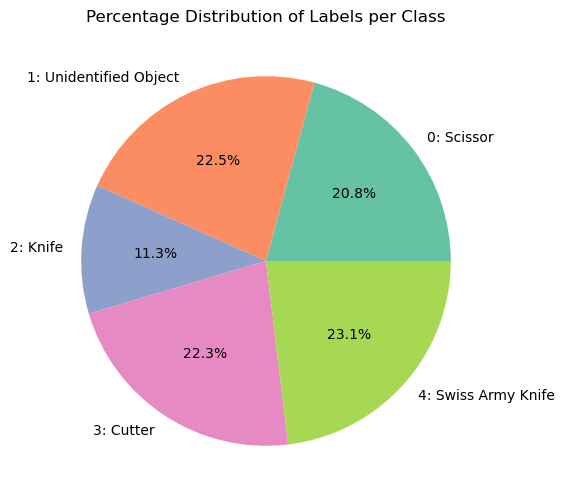

In [10]:
# Create a distribution of each class

# Create all_labels variables
all_labels = [label for sublist in df['labels'] for label in sublist]

# Create a distribution
label_counts = pd.Series(all_labels).value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=[
    "0: Scissor", 
    "1: Unidentified Object", 
    "2: Knife", 
    "3: Cutter", 
    "4: Swiss Army Knife"
], autopct='%1.1f%%', colors=sns.color_palette("Set2"))

# Add title and show the visualization
plt.title("Percentage Distribution of Labels per Class")
plt.show()

Berdasarkan hasil Pie Chart, Kelas 4: **Swiss Army Knife** memperoleh nilai persentase paling tinggi senilai **23.1%**. Hal ini menunjukan bahwa benda tersebut sering muncul saat pemindaian menggunakan X-Ray. Setelah itu, dilanjutkan dengan urutan kedua senilai **22.5%** dengan nama benda **Unidentified Object**. Untuk kelas lainnya, benda tersebut sudah memiliki informasi yang jelas barang apa saja yaitu **Cutter**, **Scissor**, dan **Knife**.<p>
Informasi dataset ini kami dapatkan dari [Kaggle](https://www.kaggle.com/datasets/orvile/x-ray-baggage-anomaly-detection/data). Namun, ada hal yang perlu disampaikan bahwa menurut kami dataset tersebut memiliki miss-information mengenai Kelas 1, sehingga kami menyebutnya sebagai Unidentified Object, seperti yang sudah ditulis sebelumnya.

### **B. Class 0**

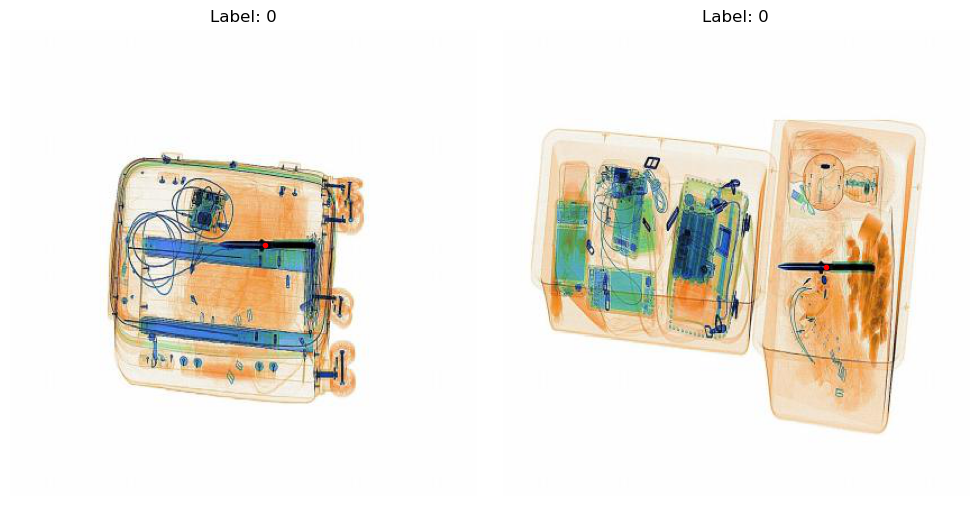

In [11]:
# Class 0

# Create the visualization of 1 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a function
for i, idx in enumerate([703, 704]): 
    axes[i].imshow(Image.open(TRAIN_DATASET_PATH + "images/" + images_path_df["images"][idx]))
    x = df["x_center"][idx][0] * 416
    y = df["y_center"][idx][0] * 416
    axes[i].plot(x, y, marker='o', markersize=3, color="red")
    axes[i].set_title(f"Label: {df['labels'][idx][0]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Berdasarkan Visualisasi Kelas 0, terlihat bahwa label dan posisi objek cukup akurat dan anotasi konsisten dengan label kebenaran dasar. Pada kedua gambar tersebut, tampak objek logam memanjang dengan bentuk seperti dua bilah pisau, yang sangat memungkinkan adalah **Gunting**.<br>
Hal ini menunjukan ciri-cirinya sebagai berikut:
- Terdiri dari dua bilah logam
- Terdapat engsel / pivot
- Biasanya gagang gunting biasa berbentuk lingkaran atau oval dengan memiliki dua lubang. Namun, pada visualisasi ini menunjukan bahwa gagang tersebut berbentuk panjang dan cukup besar sehingga bisa dikatakan **Gunting Rumput**.

### **C. Class 1**

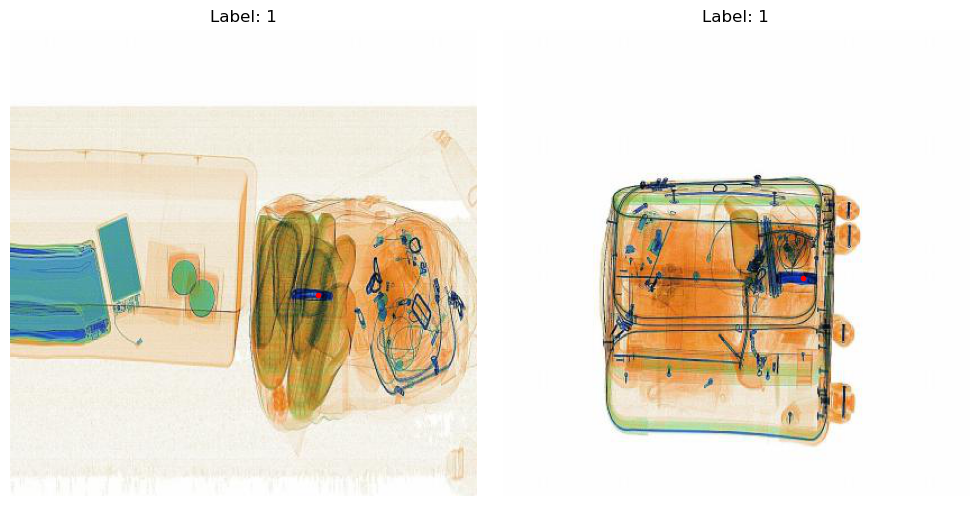

In [12]:
# Class 1

# Create the visualization of 1 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a function
for i, idx in enumerate([2022, 2034]): 
    axes[i].imshow(Image.open(TRAIN_DATASET_PATH + "images/" + images_path_df["images"][idx]))
    x = df["x_center"][idx][0] * 416
    y = df["y_center"][idx][0] * 416
    axes[i].plot(x, y, marker='o', markersize=3, color="red")
    axes[i].set_title(f"Label: {df['labels'][idx][0]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Kelas 1 ini menampilkan angka persentase kedua tertinggi dari kelima kelas dan menunjukan benda tersebut terdeteksi logam dan benda berbahaya. Kelas ini diidentifikasikan sebagai **unidentified** object karena kurangnya informasi mengenai kelas ini. Oleh karena itu, perlu dilakukan penyelidikan secara manual alias melihat barang tersebut secara langsung untuk mengetahui kebenaran benda tersebut.

### **D. Class 2**

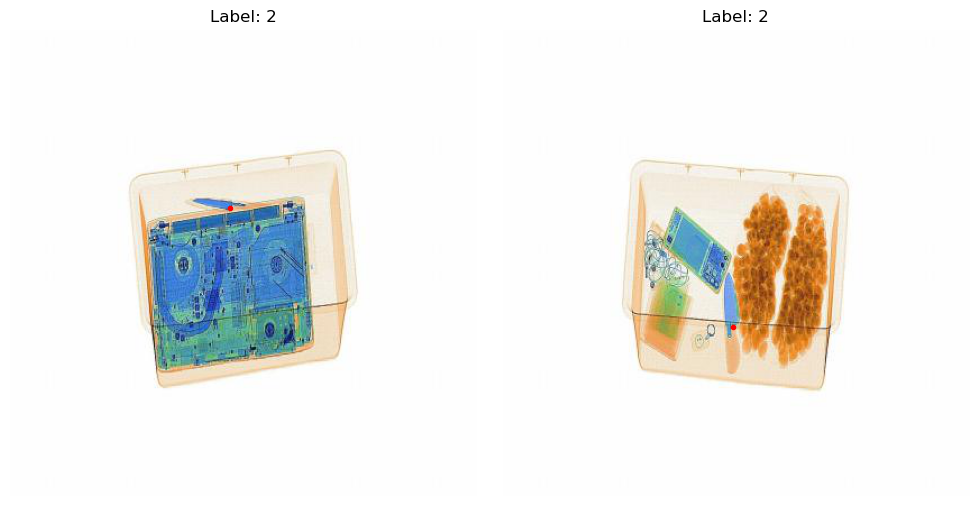

In [13]:
# Class 2

# Create the visualization of 1 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a function
for i, idx in enumerate([19, 9]): 
    axes[i].imshow(Image.open(TRAIN_DATASET_PATH + "images/" + images_path_df["images"][idx]))
    x = df["x_center"][idx][0] * 416
    y = df["y_center"][idx][0] * 416
    axes[i].plot(x, y, marker='o', markersize=3, color="red")
    axes[i].set_title(f"Label: {df['labels'][idx][0]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi Kelas 2, benda di dalam koper tersebut adalah **pisau**. Hal ini memberikan gambaran yang tepat dan jelas tentang keberadaan benda tajam pada benda tersebut, yaitu dengan menampilkan panjang blade nya biasanya lebih dari 15 cm serta memiliki pegangan / gagang yang tebal. Hal ini terbukti pada gambar pertama dan kedua yaitu berwarna orange. Material gagang ini biasanya terbuat dari kayu.

### **E. Class 3**

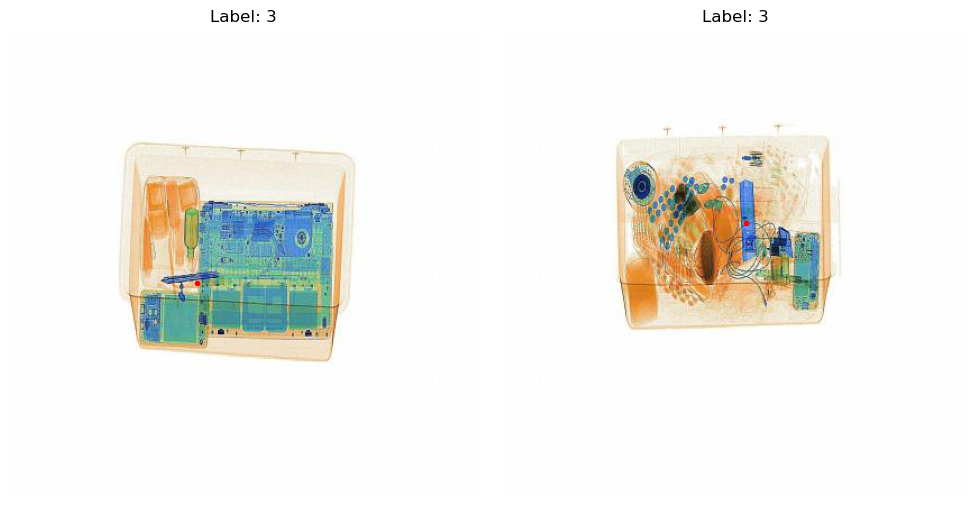

In [14]:
# Class 3

# Create the visualization of 1 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a function
for i, idx in enumerate([2048, 2020]): 
    axes[i].imshow(Image.open(TRAIN_DATASET_PATH + "images/" + images_path_df["images"][idx]))
    x = df["x_center"][idx][0] * 416
    y = df["y_center"][idx][0] * 416
    axes[i].plot(x, y, marker='o', markersize=3, color="red")
    axes[i].set_title(f"Label: {df['labels'][idx][0]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Kelas 3 terlihat mengandung objek berbentuk persegi panjang kecil atau silinder (ditandai titik merah) yang terletak di dalam koper atau tas.
Berdasarkan hasil visualisasi tersebut, barang di dalam koper tersebut merupakan **pemotong (cutter)**. Hal ini memberikan gambaran yang tepat dan tidak ambigu tentang keberadaan benda tajam pada barang tersebut, yaitu memiliki ciri-ciri berbentuk persegi panjang sekitar 10 - 15 cm dan ramping. Lalu, gagangnya biasanya terbuat dari plastik sehingga terlihat transparan di sinar X-Ray. Terakhir, bilah cutter terbuat dari logam tipis dan solid sehingga terlihat di sinar X-Ray berwarna biru tua.

### **F. Class 4**

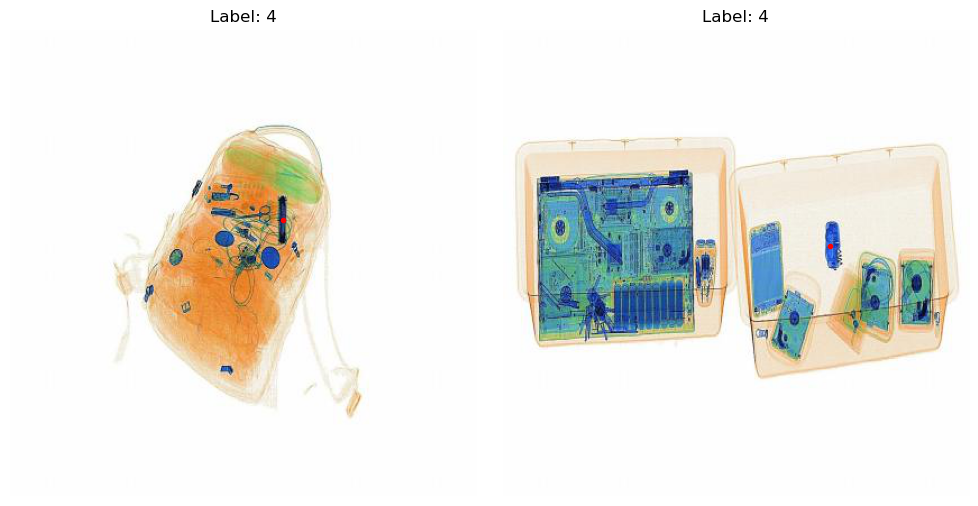

In [15]:
# Class 4

# Create the visualization of 1 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a function
for i, idx in enumerate([2008, 2009]): 
    axes[i].imshow(Image.open(TRAIN_DATASET_PATH + "images/" + images_path_df["images"][idx]))
    x = df["x_center"][idx][0] * 416
    y = df["y_center"][idx][0] * 416
    axes[i].plot(x, y, marker='o', markersize=3, color="red")
    axes[i].set_title(f"Label: {df['labels'][idx][0]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi Kelas 4, barang di dalam koper tersebut merupakan **Swiss Army Knife / Switch Blade**. Hal ini juga memberikan gambaran yang tepat dan tidak ambigu tentang keberadaan benda tajam pada barang tersebut, yaitu berbentuk persegi panjang kecil dan solid sehingga terlihat sebagai blok logam berlapis (warna biru tua).